In [38]:
import pandas as pd
import numpy as np

In [2]:
turbine_data = pd.read_csv('wind_turbine1.csv', parse_dates=['timestamps'])

In [3]:
turbine_data

,timestamps,temperature,pressure,wind_speed,rpm,energy_output
0,2024-03-01 00:00:00,83.461469,320.237375,8.521672,1607.632403,49.878046
1,2024-03-01 00:01:00,72.234567,258.605357,11.917836,1410.412267,51.908918
2,2024-03-01 00:02:00,87.463949,291.408748,15.198162,1467.465233,50.807555
3,2024-03-01 00:03:00,82.653281,277.048837,4.817437,1397.236048,50.723340
4,2024-03-01 00:04:00,76.596048,321.767906,15.054548,1680.040858,52.073233
...,...,...,...,...,...,...
1435,2024-03-01 23:55:00,94.306244,385.999227,13.298874,1712.558263,50.973704
1436,2024-03-01 23:56:00,77.634534,370.180983,15.633618,1501.985131,52.496563
1437,2024-03-01 23:57:00,81.557173,291.791419,2.566408,1505.374226,45.666873
1438,2024-03-01 23:58:00,89.843625,255.135341,9.094246,1134.341274,48.454785


In [4]:
turbine_data.describe()

,temperature,pressure,wind_speed,rpm,energy_output
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,79.857330,298.870038,9.950717,1499.304562,49.991347
std,9.955222,49.885287,4.789499,241.385959,1.745300
min,47.870464,117.245674,-3.936445,626.238694,44.176794
25%,73.079703,264.058566,6.567412,1344.651937,48.841728
50%,79.885301,297.700156,10.069468,1499.311492,49.990172
75%,86.615916,332.727809,13.217186,1655.171444,51.200867
max,105.136435,480.567503,25.683430,2303.843549,55.026903


In [5]:
turbine_data['hour'] = turbine_data['timestamps'].dt.hour

In [6]:
turbine_data

,timestamps,temperature,pressure,wind_speed,rpm,energy_output,hour
0,2024-03-01 00:00:00,83.461469,320.237375,8.521672,1607.632403,49.878046,0
1,2024-03-01 00:01:00,72.234567,258.605357,11.917836,1410.412267,51.908918,0
2,2024-03-01 00:02:00,87.463949,291.408748,15.198162,1467.465233,50.807555,0
3,2024-03-01 00:03:00,82.653281,277.048837,4.817437,1397.236048,50.723340,0
4,2024-03-01 00:04:00,76.596048,321.767906,15.054548,1680.040858,52.073233,0
...,...,...,...,...,...,...,...
1435,2024-03-01 23:55:00,94.306244,385.999227,13.298874,1712.558263,50.973704,23
1436,2024-03-01 23:56:00,77.634534,370.180983,15.633618,1501.985131,52.496563,23
1437,2024-03-01 23:57:00,81.557173,291.791419,2.566408,1505.374226,45.666873,23
1438,2024-03-01 23:58:00,89.843625,255.135341,9.094246,1134.341274,48.454785,23


In [7]:
hourly_energy_output = turbine_data.groupby('hour')['energy_output'].mean()

In [8]:
hourly_energy_output

hour
0     49.725762
1     50.269840
2     50.227242
3     49.811475
4     49.946280
5     50.111549
6     50.637179
7     50.361008
8     49.587106
9     50.245773
10    50.009930
11    49.956716
12    49.499469
13    50.395413
14    49.466982
15    50.270506
16    50.180285
17    49.894090
18    50.286125
19    49.498652
20    49.621044
21    50.006214
22    49.920697
23    49.862988
Name: energy_output, dtype: float64

In [9]:
correlation = turbine_data['wind_speed'].corr(turbine_data['energy_output'])

In [10]:
correlation

0.818129305553587

In [11]:
import seaborn as sns

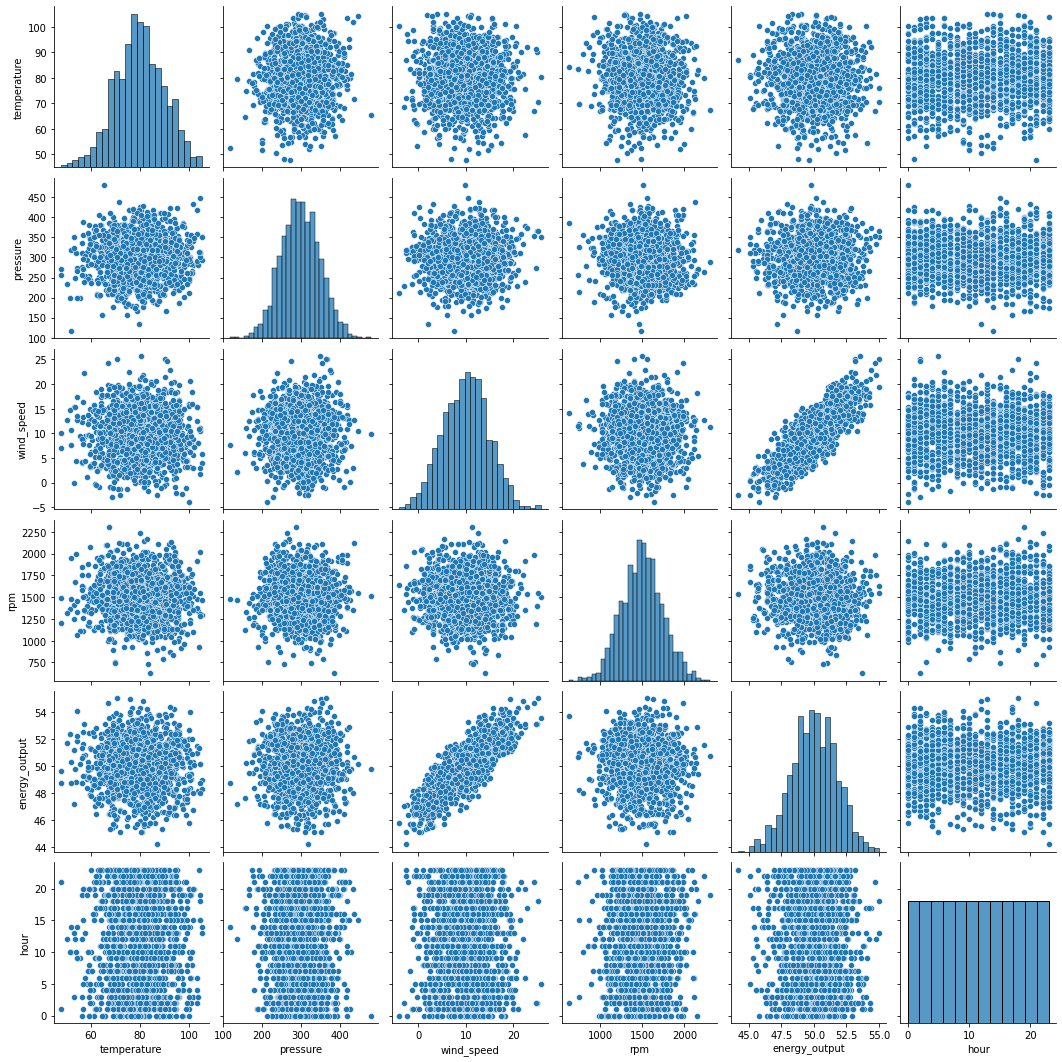

In [12]:
sns.pairplot(turbine_data)

In [16]:
moving_average = turbine_data['energy_output'].rolling(window=60).mean()

In [17]:
moving_average

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1435    49.884433
1436    49.969368
1437    49.943413
1438    49.922233
1439    49.862988
Name: energy_output, Length: 1440, dtype: float64

In [18]:
moving_average[59]

49.72576205218625

In [19]:
sum(turbine_data['energy_output'][:60])/60

49.72576205218625

In [26]:
df = pd.DataFrame(moving_average)

In [28]:
df['energy_output_1'] = turbine_data['energy_output']

In [29]:
df

,energy_output,energy_output_1
0,NaN,49.878046
1,NaN,51.908918
2,NaN,50.807555
3,NaN,50.723340
4,NaN,52.073233
...,...,...
1435,49.884433,50.973704
1436,49.969368,52.496563
1437,49.943413,45.666873
1438,49.922233,48.454785


<AxesSubplot:>

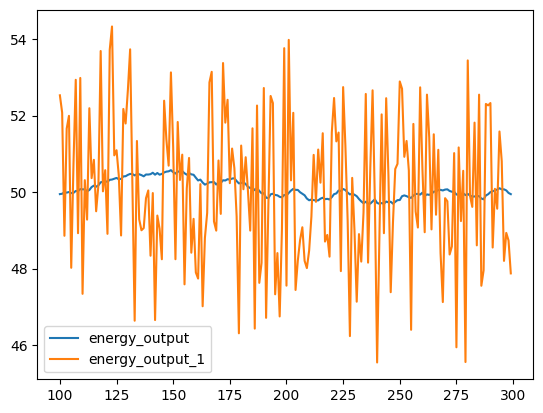

In [33]:
df[100:300].plot()

In [34]:
exp_moving_avg = turbine_data['energy_output'].ewm(span=60).mean()

In [35]:
exp_moving_avg

0       49.878046
1       50.910406
2       50.874973
3       50.835149
4       51.099544
          ...    
1435    49.960585
1436    50.043732
1437    49.900228
1438    49.852837
1439    49.794322
Name: energy_output, Length: 1440, dtype: float64

<AxesSubplot:>

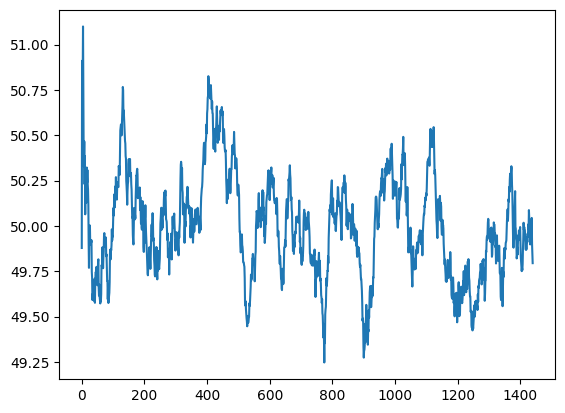

In [36]:
exp_moving_avg.plot()

In [39]:
autocorr = np.corrcoef(turbine_data['energy_output'][1:], turbine_data['energy_output'][:-1])

In [40]:
autocorr

array([[1.        , 0.02404077],
       [0.02404077, 1.        ]])